In [447]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [448]:
df = pd.read_csv(r"C:\Users\yawmo\Zillow Project\NY-House-Dataset.csv")
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [449]:
df.shape 

(4801, 17)

In [450]:
#4801 rows and 17 columns

In [451]:
df.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [452]:
df.groupby('TYPE')['TYPE'].agg('count')

TYPE
Co-op for sale                1450
Coming Soon                      2
Condo for sale                 891
Condop for sale                  5
Contingent                      88
For sale                        20
Foreclosure                     14
House for sale                1012
Land for sale                   49
Mobile house for sale            1
Multi-family home for sale     727
Pending                        243
Townhouse for sale             299
Name: TYPE, dtype: int64

In [453]:
# in this dataset we mainly have co-ops, Houses, and Condos

In [454]:
#encode a label for each type of real estate

from sklearn.preprocessing import LabelEncoder
#encoding Type since its not done yet
if 'TYPE_ENCODED' not in df.columns:
    label_encoder_type = LabelEncoder()
    df['TYPE_ENCODED'] = label_encoder.fit_transform(df['TYPE'])

if 'SUBLOCALITY_ENCODED' not in df.columns:
    label_encoder_sublocality = LabelEncoder()
    df['SUBLOCALITY_ENCODED'] = label_encoder_sublocality.fit_transform(df['SUBLOCALITY'])

df = df.dropna()
    


In [455]:
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,TYPE_ENCODED,SUBLOCALITY_ENCODED
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,2,10
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,2,12
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,7,16
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,2,12
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,0,11
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,0,14
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,0,12
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,2,13


In [456]:
#find sublocatlities when you return
#from sklearn.preprocessing import LabelEncoder

# Create a label encoder object


# Apply the label encoder to the 'SUBLOCALITY' column and create a new column for the encoded values


# Display the original 'SUBLOCALITY' column along with the new 'SUBLOCALITY_ENCODED' column
#sublocality_mapping = df[['SUBLOCALITY', 'SUBLOCALITY_ENCODED']].drop_duplicates().sort_values('SUBLOCALITY_ENCODED')

# Display the mapping
#sublocality_mapping.reset_index()

In [457]:
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,TYPE_ENCODED,SUBLOCALITY_ENCODED
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,2,10
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,2,12
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,7,16
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,2,12
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,0,11
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,0,14
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,0,12
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,2,13


In [458]:
#mapping sublocalities
sublocality_mapping = pd.DataFrame({
    'SUBLOCALITY': df['SUBLOCALITY'],
    'SUBLOCALITY_ENCODED': df['SUBLOCALITY_ENCODED']
}).drop_duplicates().sort_values('SUBLOCALITY_ENCODED')

sublocality_mapping.reset_index()
# Bronx - 0
# Brookyln - 1
# Brooklyn Heights 2
# Coney Island 3
# Dumbo 4
# East Bronx 5
# Flushing 6
# Fort Hamilton 7
# Jackson Heights 8
# Kings County 9
# Manhattan 10 
# New York 11
# New York County 12
# Queens 13
# Queens County 14
# Rego Park 15
# Richmond County 16
# Riverdale 17
# Snyder Ave 18
# Staten Island 19
# The Bronx 20

,index,SUBLOCALITY,SUBLOCALITY_ENCODED
0,22,Bronx County,0
1,9,Brooklyn,1
2,1168,Brooklyn Heights,2
3,797,Coney Island,3
4,3569,Dumbo,4
5,8,East Bronx,5
6,3349,Flushing,6
7,2879,Fort Hamilton,7
8,1283,Jackson Heights,8
9,5,Kings County,9


In [459]:
# Query to display unique TYPE and TYPE_ENCODED pairs
type_mapping = pd.DataFrame({
    'TYPE': df['TYPE'],
    'TYPE_ENCODED': df['TYPE_ENCODED']
}).drop_duplicates().sort_values('TYPE_ENCODED')
type_mapping.reset_index()
#0 is co-op
#1 is coming soon
#2 is condo
#3 is condo-op 
#4 is contigent
#5 is for sale
#6 is foreclosure
#7 is house for sale
#8 is land for sale
#9 is mobile house
#10 is multifamily
#11 is pending
#12 is townhouse


,index,TYPE,TYPE_ENCODED
0,8,Co-op for sale,0
1,103,Coming Soon,1
2,0,Condo for sale,2
3,2422,Condop for sale,3
4,67,Contingent,4
5,59,For sale,5
6,79,Foreclosure,6
7,2,House for sale,7
8,75,Land for sale,8
9,1002,Mobile house for sale,9


In [460]:
# Dropping unneeded rows for "Coming soon, contigent, for sale, foreclosure, pending" where TYPE_ENCODED is 1, 4, 5, 6, or 11
df_filtered = df[~df['TYPE_ENCODED'].isin([1, 4, 5, 6, 11])]
df_filtered

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,TYPE_ENCODED,SUBLOCALITY_ENCODED
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,2,10
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,2,12
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,7,16
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,2,12
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,0,11
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,0,14
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,0,12
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,2,13


In [461]:
#dropping irrelevant columns
df_0 = df_filtered.drop(['BROKERTITLE', 'TYPE','ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2','STATE', 'MAIN_ADDRESS', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME',  'FORMATTED_ADDRESS', 'LONG_NAME'], axis = 'columns')

In [462]:
df_0

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_ENCODED,SUBLOCALITY_ENCODED
0,315000,2,2.000000,1400.000000,40.761255,-73.974483,2,10
1,195000000,7,10.000000,17545.000000,40.766393,-73.980991,2,12
2,260000,4,2.000000,2015.000000,40.541805,-74.196109,7,16
3,69000,3,1.000000,445.000000,40.761398,-73.974613,2,12
4,55000000,7,2.373861,14175.000000,40.767224,-73.969856,12,12
...,...,...,...,...,...,...,...,...
4796,599000,1,1.000000,2184.207862,40.774350,-73.955879,0,11
4797,245000,1,1.000000,2184.207862,40.732538,-73.860152,0,14
4798,1275000,1,1.000000,2184.207862,40.745882,-74.003398,0,12
4799,598125,2,1.000000,655.000000,40.742770,-73.872752,2,13


In [463]:
#check nulls

In [464]:
df_0.isnull().sum()

PRICE                  0
BEDS                   0
BATH                   0
PROPERTYSQFT           0
LATITUDE               0
LONGITUDE              0
TYPE_ENCODED           0
SUBLOCALITY_ENCODED    0
dtype: int64

In [465]:
#no nulls!

In [466]:
#object type
df_0.info() #Objects: Type, State, Main_Address. #Ints: Price, Beds, Type_ENCODED #Float: Bath, PropertySQFT

<class 'pandas.core.frame.DataFrame'>
Index: 4434 entries, 0 to 4800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PRICE                4434 non-null   int64  
 1   BEDS                 4434 non-null   int64  
 2   BATH                 4434 non-null   float64
 3   PROPERTYSQFT         4434 non-null   float64
 4   LATITUDE             4434 non-null   float64
 5   LONGITUDE            4434 non-null   float64
 6   TYPE_ENCODED         4434 non-null   int32  
 7   SUBLOCALITY_ENCODED  4434 non-null   int32  
dtypes: float64(4), int32(2), int64(2)
memory usage: 277.1 KB


In [467]:
#EDA
# Filter the dataset for condos in Manhattan
df_condos_manhattan = df_0[(df_0['TYPE_ENCODED'] == 2) & (df_0['SUBLOCALITY_ENCODED'] == 10)]

# Display the first few rows
df_condos_manhattan.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_ENCODED,SUBLOCALITY_ENCODED
0,315000,2,2.0,1400.0,40.761255,-73.974483,2,10
161,2000000,3,2.0,2000.0,40.708644,-74.016195,2,10
349,559000,1,1.0,679.0,40.794574,-73.943421,2,10
1252,4250000,3,4.0,2054.0,40.770476,-73.957455,2,10
2221,16995000,4,4.0,3310.0,40.740518,-73.988109,2,10


In [468]:
# Summary statistics for condos in Manhattan
condos_manhattan_stats = df_condos_manhattan.describe()
condos_manhattan_stats #average price of a condo is $4,541,000! lowest price 315,000, Largest: 16.9M!

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_ENCODED,SUBLOCALITY_ENCODED
count,1.400000e+01,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.0
mean,4.541000e+06,2.357143,2.500000,1812.029695,40.759192,-73.978706,2.0,10.0
std,4.486496e+06,0.928783,1.091928,688.904111,0.022184,0.019027,0.0,0.0
min,3.150000e+05,1.000000,1.000000,679.000000,40.708644,-74.016195,2.0,10.0
25%,1.996250e+06,2.000000,2.000000,1395.500000,40.745702,-73.986703,2.0,10.0
50%,3.397500e+06,2.500000,2.500000,1928.000000,40.765248,-73.981327,2.0,10.0
75%,4.962500e+06,3.000000,3.000000,2184.207862,40.771380,-73.974483,2.0,10.0
max,1.699500e+07,4.000000,4.000000,3310.000000,40.794574,-73.943421,2.0,10.0


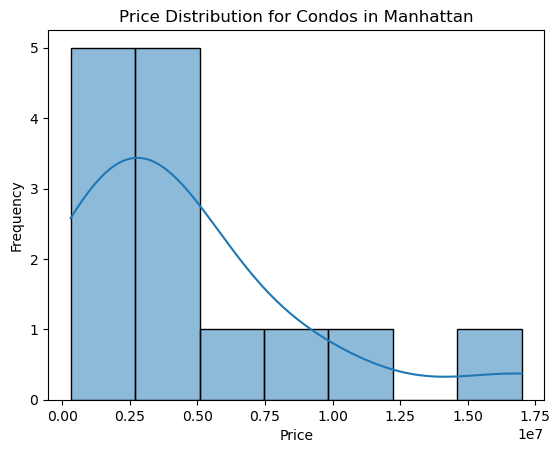

In [469]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for price
sns.histplot(df_condos_manhattan['PRICE'], kde=True)
plt.title('Price Distribution for Condos in Manhattan')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [553]:
# Filter the dataset for homes in Bronx
df_homes_bronx_county = df_0[(df_0['TYPE_ENCODED'] == 7) & (df['SUBLOCALITY_ENCODED'] == 0)]
df_homes_east_bronx = df_0[(df_0['TYPE_ENCODED'] == 7) & (df['SUBLOCALITY_ENCODED'] == 8)]
df_homes_riverdale = df_0[(df_0['TYPE_ENCODED'] == 7) & (df['SUBLOCALITY_ENCODED'] == 17)]
df_homes_the_bronx = df_0[(df_0['TYPE_ENCODED'] == 7) & (df['SUBLOCALITY_ENCODED'] == 20)]
# Concatenate the DataFrames along rows
df_all_Bronx_homes = pd.concat([df_homes_bronx_county, df_homes_east_bronx, df_homes_riverdale, df_homes_the_bronx])# Display the first few rows
df_all_Bronx_homes.head()



C:\Users\yawmo\AppData\Local\Temp\ipykernel_33028\3100005031.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_homes_bronx_county = df_0[(df_0['TYPE_ENCODED'] == 7) & (df['SUBLOCALITY_ENCODED'] == 0)]
C:\Users\yawmo\AppData\Local\Temp\ipykernel_33028\3100005031.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_homes_east_bronx = df_0[(df_0['TYPE_ENCODED'] == 7) & (df['SUBLOCALITY_ENCODED'] == 8)]
C:\Users\yawmo\AppData\Local\Temp\ipykernel_33028\3100005031.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_homes_riverdale = df_0[(df_0['TYPE_ENCODED'] == 7) & (df['SUBLOCALITY_ENCODED'] == 17)]
C:\Users\yawmo\AppData\Local\Temp\ipykernel_33028\3100005031.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_homes_the_bronx = df_0[(df_0['TYPE_ENCODED'] == 7) & (df['SUBLOCALITY_ENCODED'] == 20)]


,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_ENCODED,SUBLOCALITY_ENCODED
97,245000,3,1.000000,2184.207862,40.869011,-73.856444,7,0
98,400000,7,3.000000,2385.000000,40.896915,-73.865498,7,0
112,688888,4,2.000000,2846.000000,40.872618,-73.865177,7,0
131,1249000,3,2.373861,2184.207862,40.882291,-73.913730,7,0
137,499000,5,2.000000,1760.000000,40.866386,-73.887895,7,0


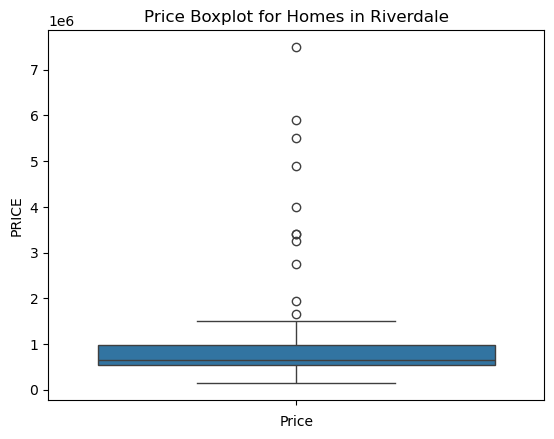

In [471]:
# Boxplot for price
sns.boxplot(df_all_Bronx_homes['PRICE'])
plt.title('Price Boxplot for Homes in Riverdale')
plt.xlabel('Price')
plt.show() #looks like prices are a little under 1M

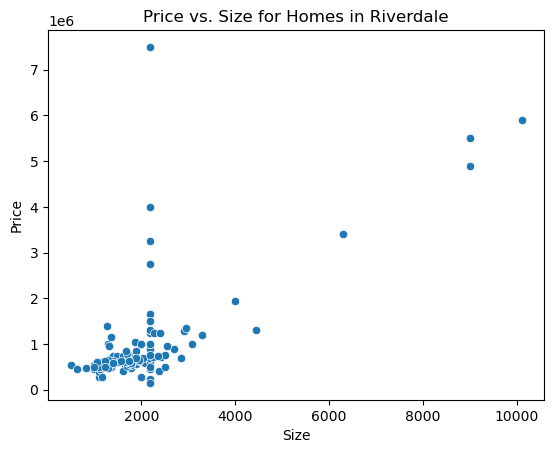

In [517]:
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=df_all_Bronx_homes)
plt.title('Price vs. Size for Homes in Riverdale')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()
#most homes are 2000 sq ft

In [531]:
# Define the features (X) and the target (y)
X = df_0[['SUBLOCALITY_ENCODED', 'TYPE_ENCODED', 'PROPERTYSQFT', 'BEDS','BATH']]  
y = df_0['PRICE']  # Assuming 'PRICE' is the target variable

In [533]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#80 train, 20 test

In [535]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [537]:
# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [539]:
mse, r2 #the model is terrible -74.5%, what are the coefficients?

(22057647976833.113, -0.7454529227940219)

In [541]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients 

,Coefficient
SUBLOCALITY_ENCODED,1.132010e+05
TYPE_ENCODED,-1.060641e+05
PROPERTYSQFT,1.541019e+03
BEDS,-4.849612e+05
BATH,1.189282e+06


In [473]:
#it makes no sense that more beds would be lead to a lower price
#Hypothesis 1: A general model where I compare mobile homes, townhouses, condos, homes, and mulitfamilies in the same model doesn't work
#let's try condos alone

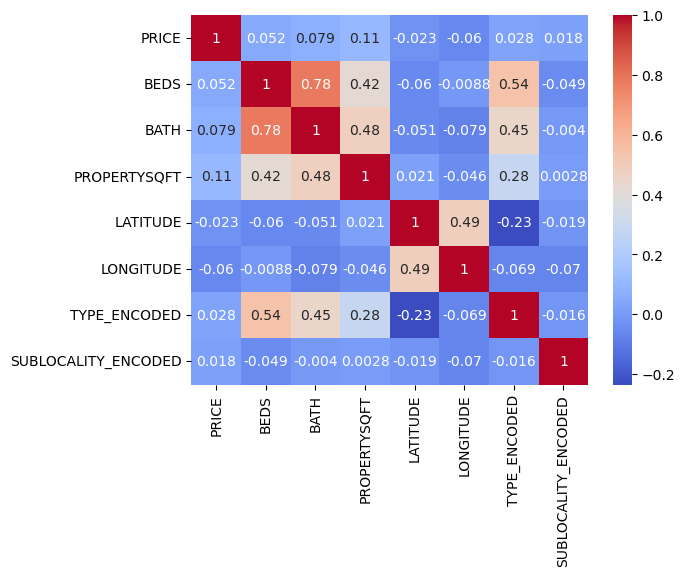

In [543]:
#test for multicollinearity

corr_matrix = df_0.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#none of these variables have  astong correlation with price at all
#maybe it doesn't make sense to compare different types of property types together
#let's do condos alone

In [545]:
df_condos = df_0[df_0['TYPE_ENCODED'] == 2]  # Assuming 2 corresponds to condos

# Split the data and run the regression analysis only on condos
X_condos = df_condos[['SUBLOCALITY_ENCODED', 'PROPERTYSQFT', 'BEDS', 'BATH']]
y_condos = df_condos['PRICE']

X_train_condos, X_test_condos, y_train_condos, y_test_condos = train_test_split(X_condos, y_condos, test_size=0.2, random_state=42)

model_condos = LinearRegression()
model_condos.fit(X_train_condos, y_train_condos)
y_pred_condos = model_condos.predict(X_test_condos)

r2_condos = r2_score(y_test_condos, y_pred_condos)
print(f"R² for Condos: {r2_condos}")

R² for Condos: 0.17781202004530572


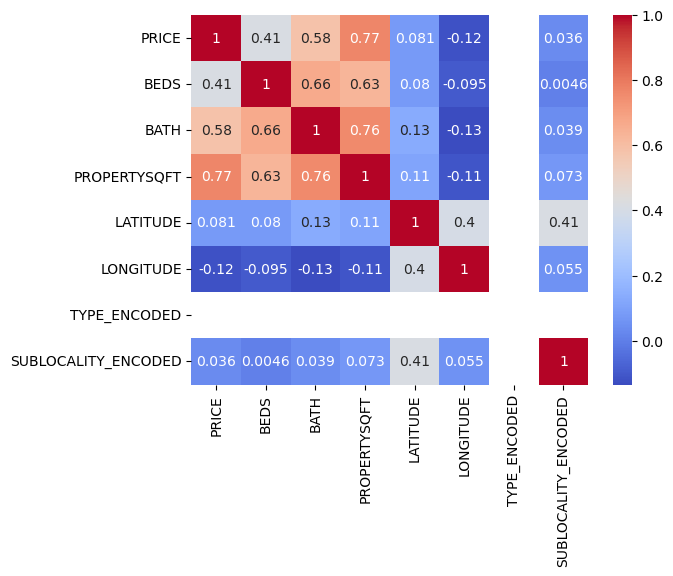

In [547]:
#weak R^2: 18%
#test for multicollinearity

corr_matrix = df_condos.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [558]:
#beds, bath, propertysquared are good variables
#latitude and latitude I want to remove, sublocality component has a very weak correlation...
#this is probably because condo prices in NY are so different based off locatioN!
df_all_Bronx_homes

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_ENCODED,SUBLOCALITY_ENCODED
97,245000,3,1.000000,2184.207862,40.869011,-73.856444,7,0
98,400000,7,3.000000,2385.000000,40.896915,-73.865498,7,0
112,688888,4,2.000000,2846.000000,40.872618,-73.865177,7,0
131,1249000,3,2.373861,2184.207862,40.882291,-73.913730,7,0
137,499000,5,2.000000,1760.000000,40.866386,-73.887895,7,0
...,...,...,...,...,...,...,...,...
4645,1000000,8,3.000000,2184.207862,40.878186,-73.862926,7,0
4677,700000,4,2.000000,1890.000000,40.885187,-73.854142,7,0
4695,634999,4,2.000000,1732.000000,40.902829,-73.852482,7,0
748,1950000,5,4.000000,4000.000000,40.905735,-73.911170,7,20


In [564]:
df_all_Bronx_houses = df_all_Bronx_homes[(df_all_Bronx_homes['TYPE_ENCODED'] == 7)]
df_all_Bronx_houses

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_ENCODED,SUBLOCALITY_ENCODED
97,245000,3,1.000000,2184.207862,40.869011,-73.856444,7,0
98,400000,7,3.000000,2385.000000,40.896915,-73.865498,7,0
112,688888,4,2.000000,2846.000000,40.872618,-73.865177,7,0
131,1249000,3,2.373861,2184.207862,40.882291,-73.913730,7,0
137,499000,5,2.000000,1760.000000,40.866386,-73.887895,7,0
...,...,...,...,...,...,...,...,...
4645,1000000,8,3.000000,2184.207862,40.878186,-73.862926,7,0
4677,700000,4,2.000000,1890.000000,40.885187,-73.854142,7,0
4695,634999,4,2.000000,1732.000000,40.902829,-73.852482,7,0
748,1950000,5,4.000000,4000.000000,40.905735,-73.911170,7,20


In [568]:
#Feature engineering
df_all_Bronx_houses['BED_BATH_RATIO'] = df_all_Bronx_houses['BEDS'] / df_all_Bronx_houses['BATH']

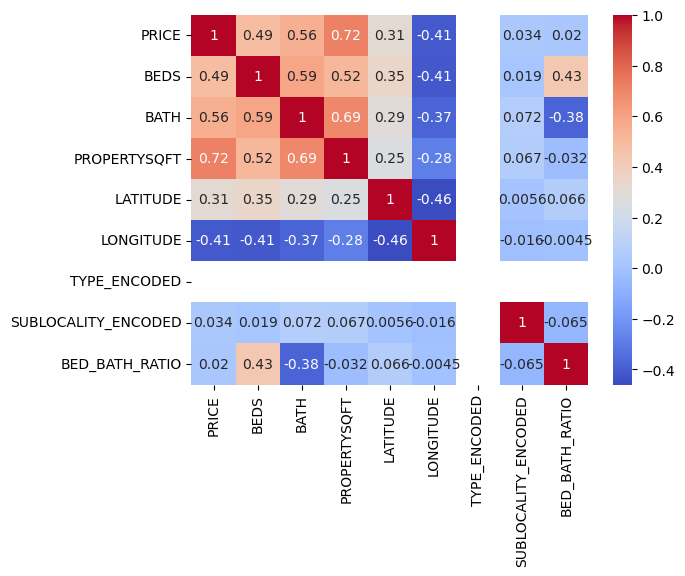

In [572]:
#test for multicollinearity

corr_matrix_2 = df_all_Bronx_houses.corr()
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm')
plt.show()

In [549]:
X1 = df_all_Bronx_houses[['BEDS', 'BATH', 'PROPERTYSQFT']]
y1 = df_all_Bronx_houses['PRICE']



In [592]:
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(X1, y1, test_size=0.2, random_state=42)

model_house = LinearRegression()
model_house.fit(X_train_house, y_train_house)
y_pred_house = model_house.predict(X_test_house)

r2_house = r2_score(y_test_house, y_pred_house)
print(f"R² for Bronx Houses: {r2_house}")

R² for Bronx Houses: 0.8217713528524997
